In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from ecape_parcel.calc import calc_ecape_parcel
from ecape_parcel.ecape_calc import calc_ecape
import metpy.calc as mpcalc
from metpy.calc import dewpoint_from_specific_humidity, parcel_profile, cape_cin
from metpy.units import units
from metpy.plots import SkewT
import matplotlib.pyplot as plt
import sounderpy as spy


## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                     v3.0.3 | Mar. 2024 | (C) Kyle J Gillett                      ##
##                 Docs: https://kylejgillett.github.io/sounderpy/                  ##
## --------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------ ##



In [2]:
# This file uses real-world meteorological data as a test for the ECAPE parcel code. 
# May be removed from repository later on if any circular dependency issues come up
year  = '2007' 
month = '08'
day   = '18'
hour  = '21'
latlon = [35, -92]
method = 'rap' 

clean_data = spy.get_model_data(method, latlon, year, month, day, hour)

p = clean_data['p']
T = clean_data['T']
Td = clean_data['Td']
z = clean_data['z']
u = clean_data['u']
v = clean_data['v'] 

parcel_p, parcel_z, parcel_T, parcel_qv, parcel_qt = calc_ecape_parcel(p, z, T, Td, u, v, True, cape_type="mixed_layer")


> RAP REANALYSIS DATA ACCESS FUNCTION --
-----------------------------------------
> DATASET USED: RUC_13km
> COMPLETE --------
> RUNTIME: 00:00:12
> SUMMARY: 21Z RUC F00 for [35, -92] at 08-18-2007-21Z
 
> THERMODYNAMICS --------------------------------------------- 
--- SBCAPE: 3084.2 | MUCAPE: 3084.2 | MLCAPE: 2366.0 | MUECAPE: 1432.7
--- MU 0-3: 117.1 | MU 0-6: 723.3 | SB 0-3: 117.1 | SB 0-6: 723.3
 
> KINEMATICS ------------------------------------------------- 
--- 0-500 SRW: 11.2 knot | 0-500 SWV: 0.001 | 0-500 SHEAR: 5.9 | 0-500 SRH: 3.2
--- 1-3km SRW: 17.5 knot | 1-3km SWV: 0.002 | 1-3km SHEAR: 9.7 | | 1-3km SRH: -0.4
 


COMPUTING & PLOTTING SPECIAL PARCELS -- this may take a moment
> COMPLETE --------
> RUNTIME: 00:00:22


<module 'matplotlib.pyplot' from '/home/robbyfrost/miniconda3/envs/soundings/lib/python3.9/site-packages/matplotlib/pyplot.py'>

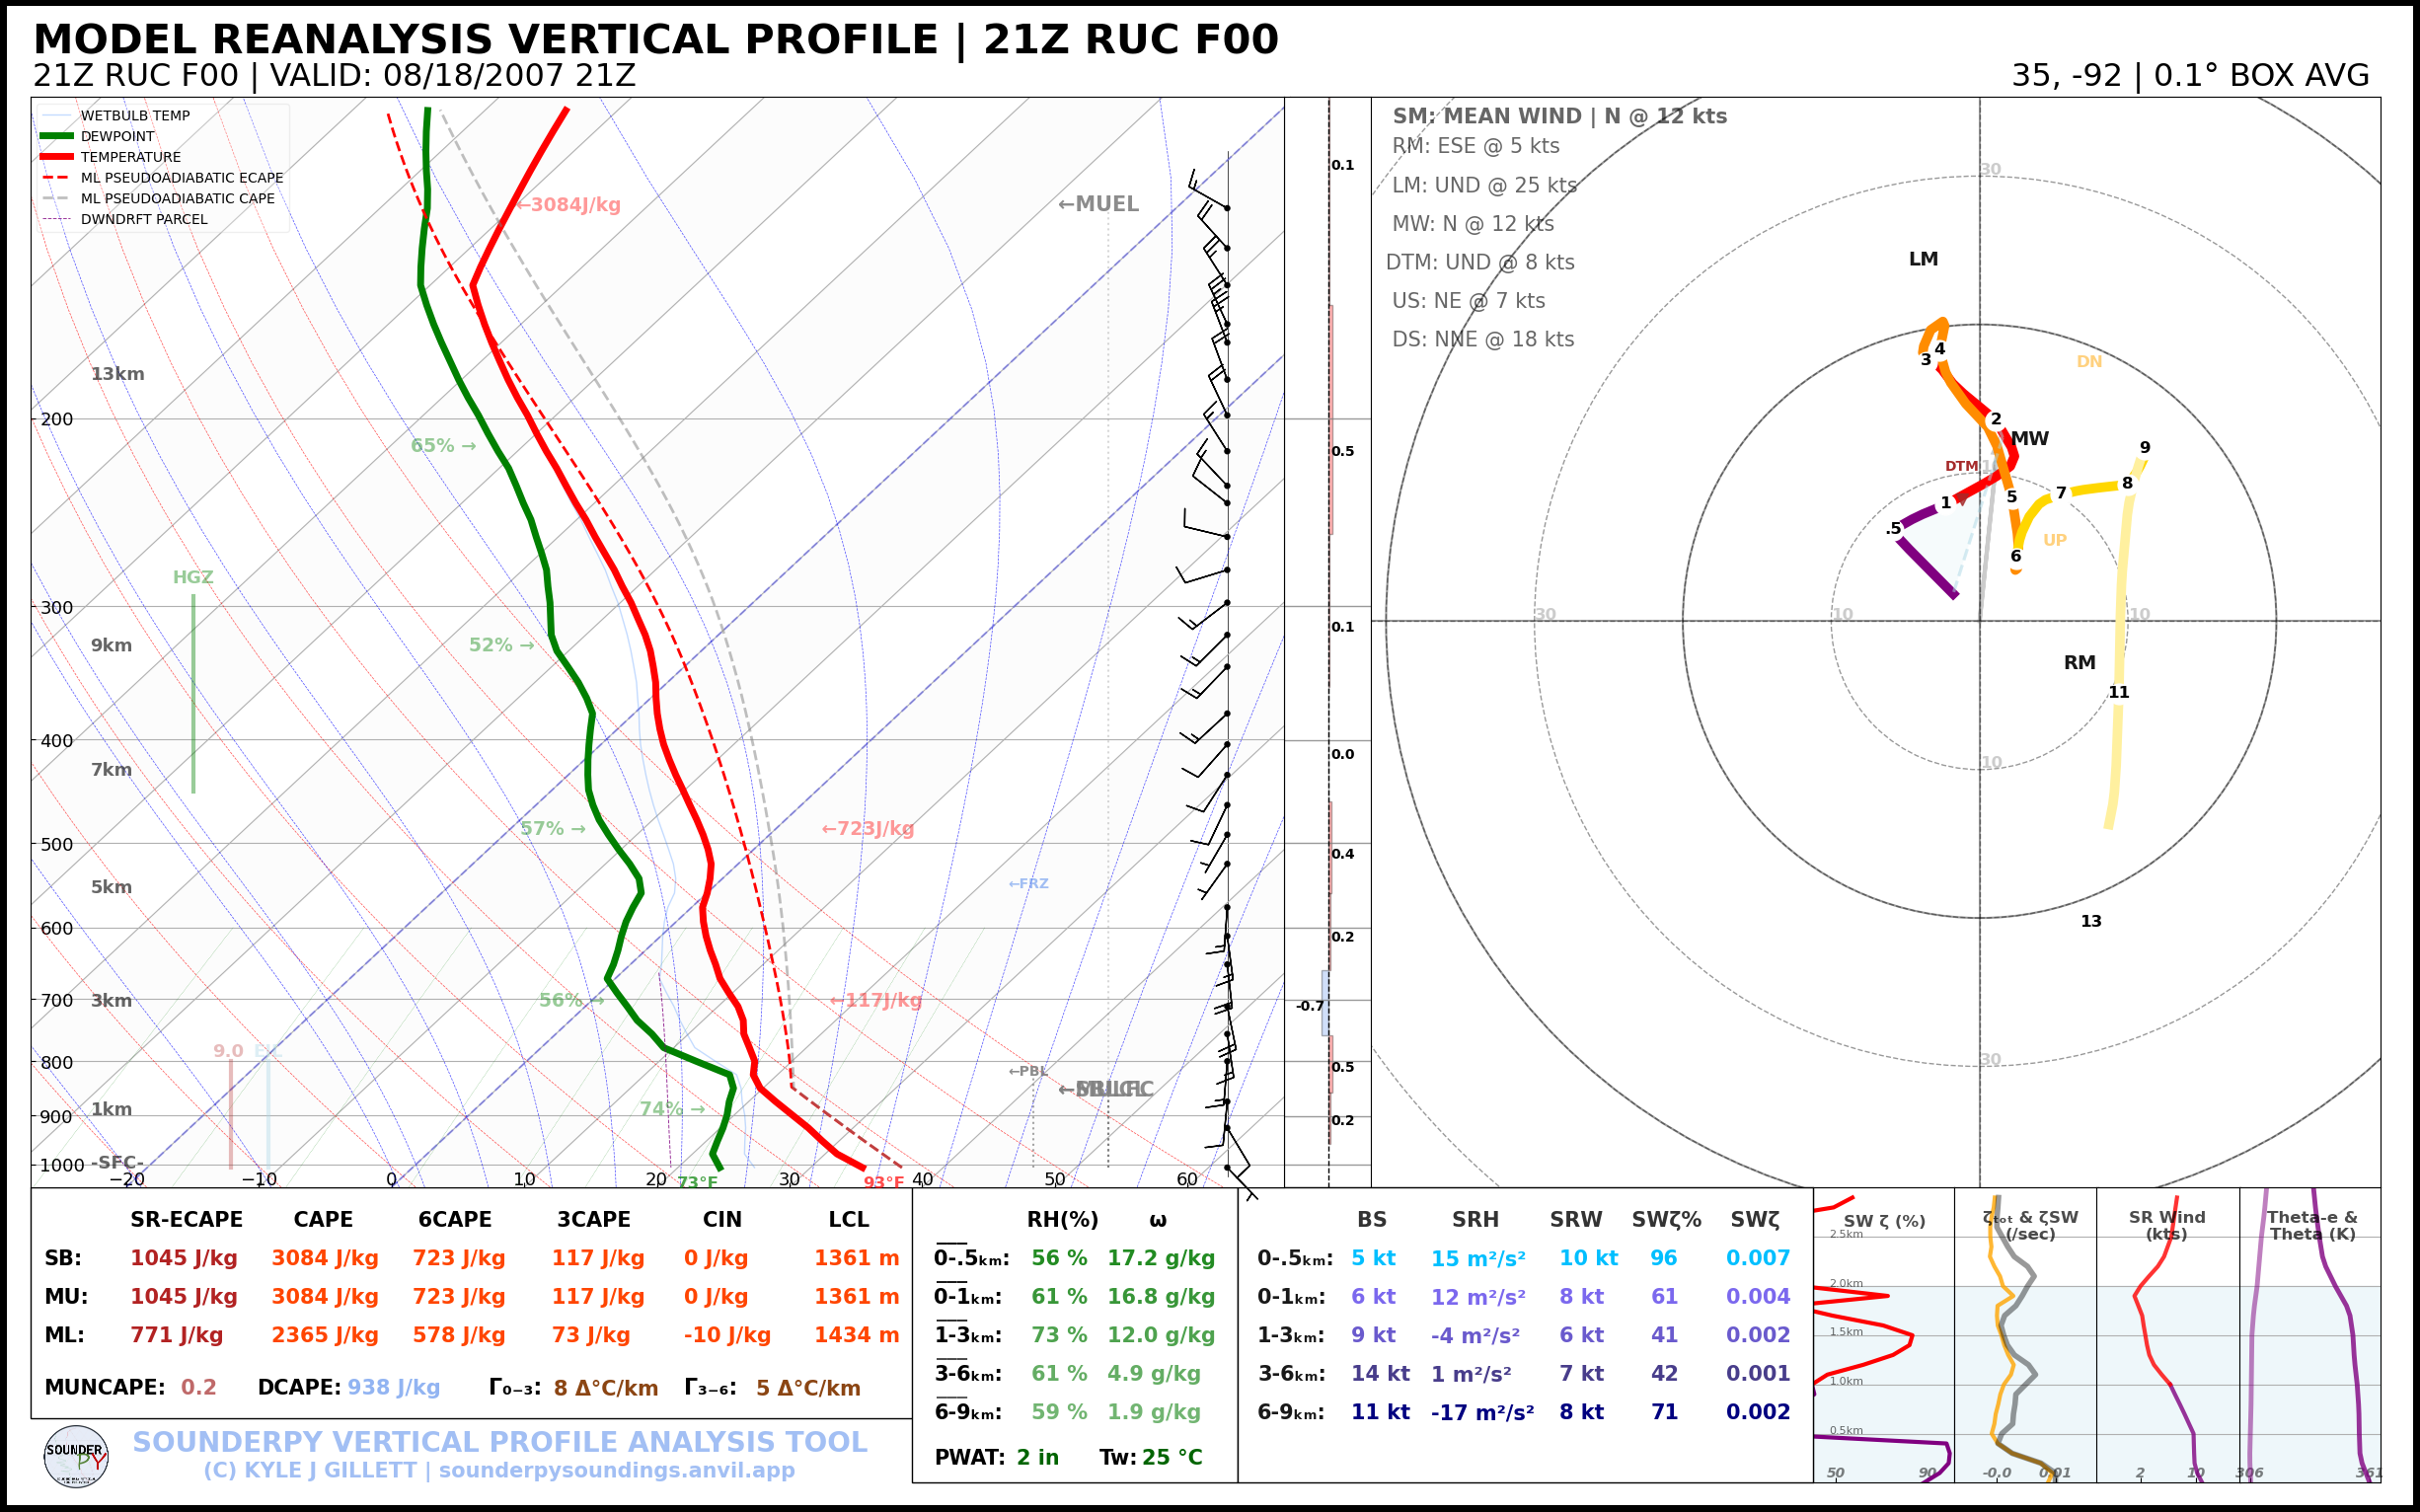

In [10]:
spy.plot.__full_sounding(clean_data, False, False, storm_motion="mean_wind", special_parcels=[["ml_ps_ecape"],["ml_ps_cape"]])